In [129]:
# 한글 폰트 깨지는것을 막아줌 (windows)
from matplotlib import font_manager, rc
font_path = '/Windows/Fonts/H2GTRM.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## 필요한 패키지 및 라이브러리

In [554]:
import pandas as pd 
import numpy as np

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns

# 스케일링 (PCA, preprocessing)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [555]:
df = pd.read_csv("편의시설 변경 버전.csv")

## 인프라(컬럼) 묶기
### 5개로 묶어보고 점점 디테일하게 바꿔보자!

['법정동명', '지하철역', '버스정류소', '서점', '골프연습장업', '목욕장업', '석유판매업', '세탁업',
       '영화상영관', '제과점영업', '체력단련장업', '병원', '약국', '의원', '치안센터', '경찰서', '119안전센터',
       '공원수', '노래방수', '당구장', '음식점수', '장보기시설', '쇼핑시설', '유흥주점', '헬스시설', '다방',
       '커피숍', '패스트푸드', '편의점', '마트']

유흥업소는 많이 없어야 좋은거 아닌가? 나중에 얘만 반대로 생각하자..

치안 : (경찰서, 119안전센터, '치안센터')  
여가 : ('헬스시설', '영화상영관','공원수')  
일반음식점 : ('다방', '커피숍', '패스트푸드','음식점수')  
보건 : ('병원', '약국', '의원')  
편의시설 : ('마트', '편의점')  
대중교통 : ('지하철역', '버스정류소')  

In [562]:
df['치안'] = df['경찰서'] + df['119안전센터'] + df['치안센터']
df['여가'] = df['헬스시설2'] +  df['영화상영관']
df['카페'] = df['다방'] + df['커피숍']
df['일반음식점'] = df['음식점_y'] + df['패스트푸드']
df['보건'] = df['병원'] + df['약국'] + df['의원']
df['편의시설'] = df['마트_y'] + df['편의점']
df['대중교통'] = df['지하철역'] + df['버스정류소']
df['술집'] = df['술집'] + df['유흥주점']

In [564]:
df = df[['법정동명','치안','여가', '일반음식점','보건','편의시설','대중교통', '카페', '술집']]
# df = df[['법정동명','일반음식점','보건','편의시설','대중교통', '카페', '술집']]
# df = df[['법정동명','치안','여가','일반음식점','보건','편의시설','지하철역', '버스정류소', '카페']]
df

,법정동명,치안,여가,일반음식점,보건,편의시설,대중교통,카페,술집
0,청운동,0,0.0,18.0,0,1.0,7,8.0,0.0
1,신교동,1,0.0,8.0,1,0.0,0,1.0,0.0
2,궁정동,1,0.0,1.0,0,0.0,1,1.0,0.0
3,효자동,0,0.0,11.0,0,0.0,2,4.0,0.0
4,창성동,0,1.0,22.0,4,2.0,2,2.0,0.0
...,...,...,...,...,...,...,...,...,...
460,둔촌동,2,10.0,177.0,34,19.0,40,35.0,2.0
461,암사동,3,19.0,356.0,92,38.0,30,65.0,14.0
462,성내동,3,57.0,915.0,170,61.0,55,129.0,21.0
463,천호동,4,24.0,950.0,205,78.0,54,122.0,49.0


In [565]:
df1 = df.drop(axis=1, columns=['법정동명'])

qcut으로 각 컬럼별로 데이터를 5개의 클래스로 나누기

In [566]:
for col in df1.columns:
    df1[col] = df1[col].astype(int)
    

In [567]:
df2 = df1

In [568]:
df2

,치안,여가,일반음식점,보건,편의시설,대중교통,카페,술집
0,0,0,18,0,1,7,8,0
1,1,0,8,1,0,0,1,0
2,1,0,1,0,0,1,1,0
3,0,0,11,0,0,2,4,0
4,0,1,22,4,2,2,2,0
...,...,...,...,...,...,...,...,...
460,2,10,177,34,19,40,35,2
461,3,19,356,92,38,30,65,14
462,3,57,915,170,61,55,129,21
463,4,24,950,205,78,54,122,49


In [570]:
df = df[['법정동명','치안','여가', '일반음식점','보건','편의시설','대중교통', '카페', '술집']]

In [571]:
df2['치안'] = pd.qcut(df1['치안'], 2, labels=[1, 2])
df2['여가'] = pd.qcut(df1['여가'], 2, labels=[1, 2])

In [572]:
df2['술집'] = pd.qcut(df1['술집'], 2, labels=[1, 2])

In [573]:
# df2['치안'] = pd.qcut(df1['치안'], 2, labels=[1, 2])
# df2['여가'] = pd.qcut(df1['여가'], 2, labels=[1, 2])
df2['일반음식점'] = pd.qcut(df1['일반음식점'], 3, labels=[1, 2, 3])
df2['보건'] = pd.qcut(df1['보건'], 3, labels=[1, 2, 3])
df2['편의시설'] = pd.qcut(df1['편의시설'], 3, labels=[1, 2, 3])
# df2['지하철역'] = pd.qcut(df1['지하철역'], 2, labels=[1, 2])
# df2['패스트푸드'] = pd.qcut(df1['패스트푸드'], 5, labels=[1, 2, 3, 4, 5])
df2['대중교통'] = pd.qcut(df1['대중교통'], 3, labels=[1, 2, 3])
df2['카페'] = pd.qcut(df1['카페'], 3, labels=[1, 2, 3])
# df2['술집'] = pd.qcut(df1['술집'], 4, labels=[1, 2, 3, 4])

MinMaxScaler는 이상하게나옴.
StandardScaler 해보자.

In [574]:
df_standard = StandardScaler().fit_transform(df2)
df_standard = pd.DataFrame(df_standard)
df_standard.describe().round(2)

,0,1,2,3,4,5,6,7
count,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.58,-0.93,-1.22,-1.16,-1.09,-1.16,-1.15,-0.99
25%,-0.58,-0.93,-1.22,-1.16,-1.09,-1.16,-1.15,-0.99
50%,-0.58,-0.93,0.00,0.04,0.09,0.04,0.04,-0.99
75%,-0.58,1.07,1.22,1.24,1.26,1.23,1.24,1.02
max,1.73,1.07,1.22,1.24,1.26,1.23,1.24,1.02


In [580]:
df_standard = MinMaxScaler().fit_transform(df2)
df_standard = pd.DataFrame(df_standard)
df_standard.describe().round(2)

,0,1,2,3,4,5,6,7
count,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00
mean,0.25,0.46,0.50,0.48,0.46,0.48,0.48,0.49
std,0.43,0.50,0.41,0.42,0.43,0.42,0.42,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.50,0.50,0.50,0.50,0.50,0.00
75%,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


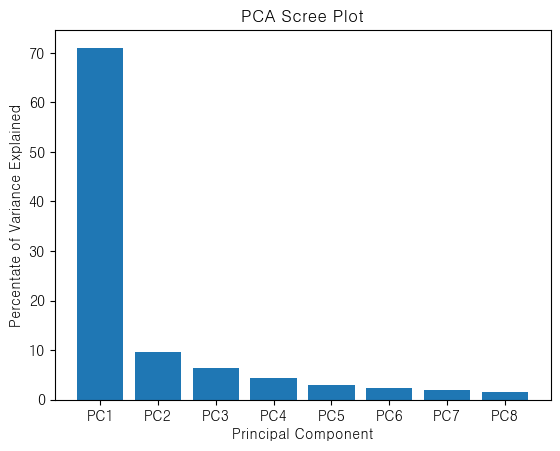

0    0.710318
1    0.807457
2    0.871334
3    0.914619
4    0.943505
5    0.966380
6    0.985299
7    1.000000
dtype: float64

In [581]:
# PCA 주성분분석
pca_test = PCA(random_state=1107)
X_p = pca_test.fit_transform(df_standard)


percent_variance = np.round(pca_test.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()
pd.Series(np.cumsum(pca_test.explained_variance_ratio_))

In [582]:
pca = PCA(n_components=5)
pc = pca.fit_transform(df_standard)
pcd = pd.DataFrame(pc)
pcd

,0,1,2,3,4
0,-1.117075,0.231316,0.161512,0.014553,-0.261947
1,-1.284521,0.069491,0.082290,-0.136180,0.034936
2,-1.284521,0.069491,0.082290,-0.136180,0.034936
3,-1.284521,0.069491,0.082290,-0.136180,0.034936
4,-1.284521,0.069491,0.082290,-0.136180,0.034936
...,...,...,...,...,...
460,1.358592,0.051552,0.334468,-0.183978,-0.207045
461,1.535283,0.025914,0.287057,-0.079511,0.033297
462,1.535283,0.025914,0.287057,-0.079511,0.033297
463,1.535283,0.025914,0.287057,-0.079511,0.033297


In [ ]:
from sklearn.cluster import KMeans

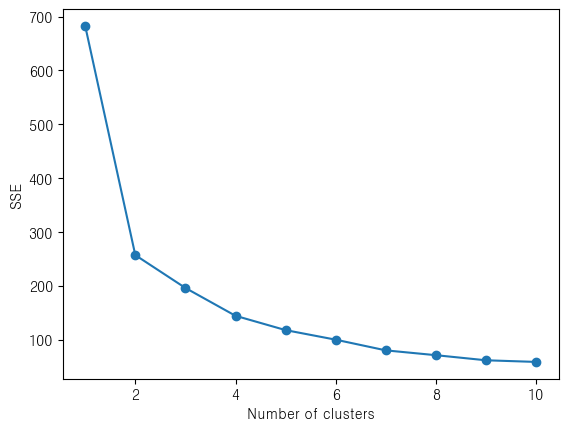

In [583]:
# 엘보우 방법을 사용하여 최적의 K값 탐색
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(pcd)
    sse.append(kmeans.inertia_)

# SSE 그래프 그리기
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


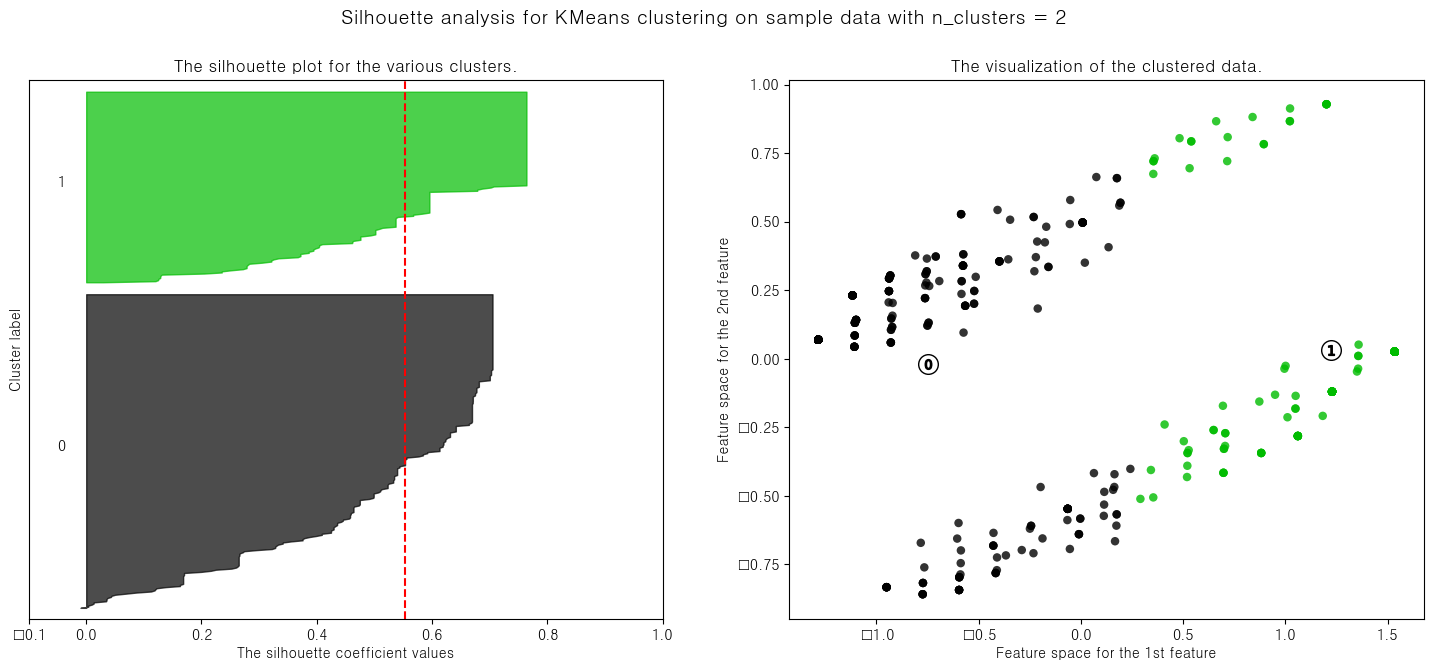

For n_clusters = 2 The average silhouette_score is : 0.5527970640575159


C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


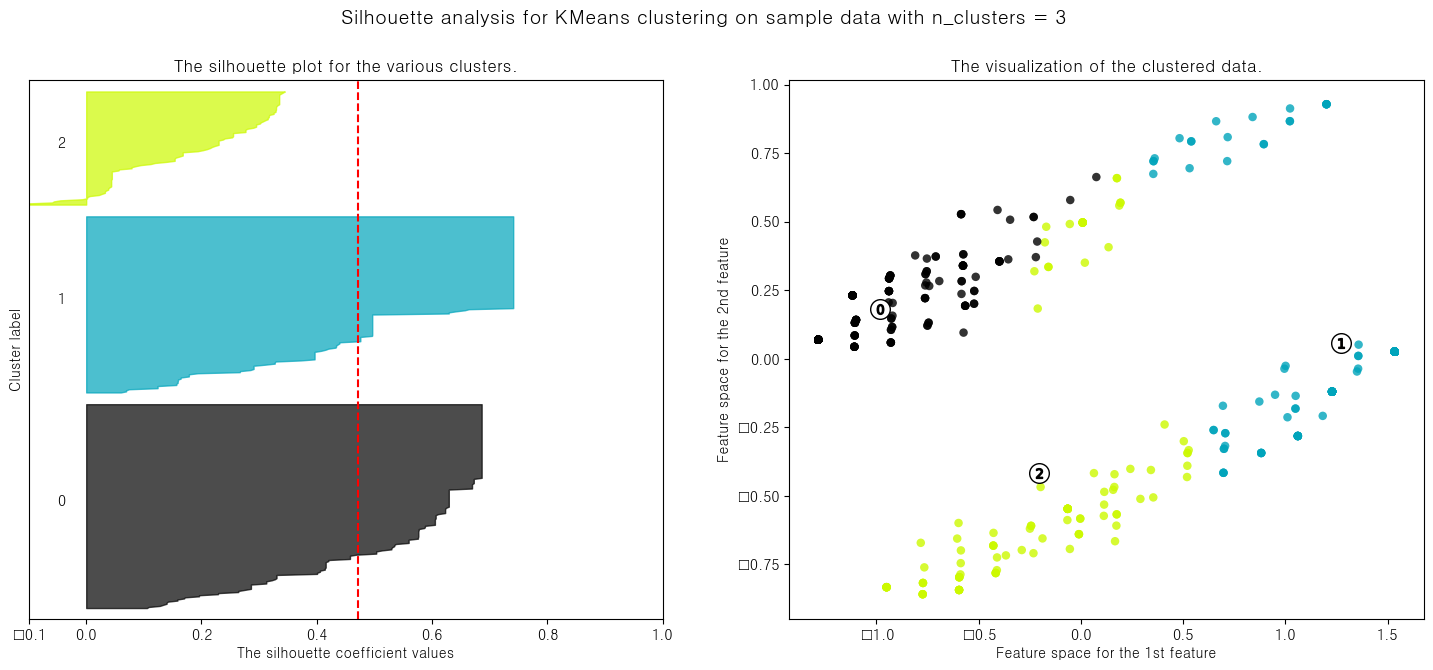

For n_clusters = 3 The average silhouette_score is : 0.47216974423486274


C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


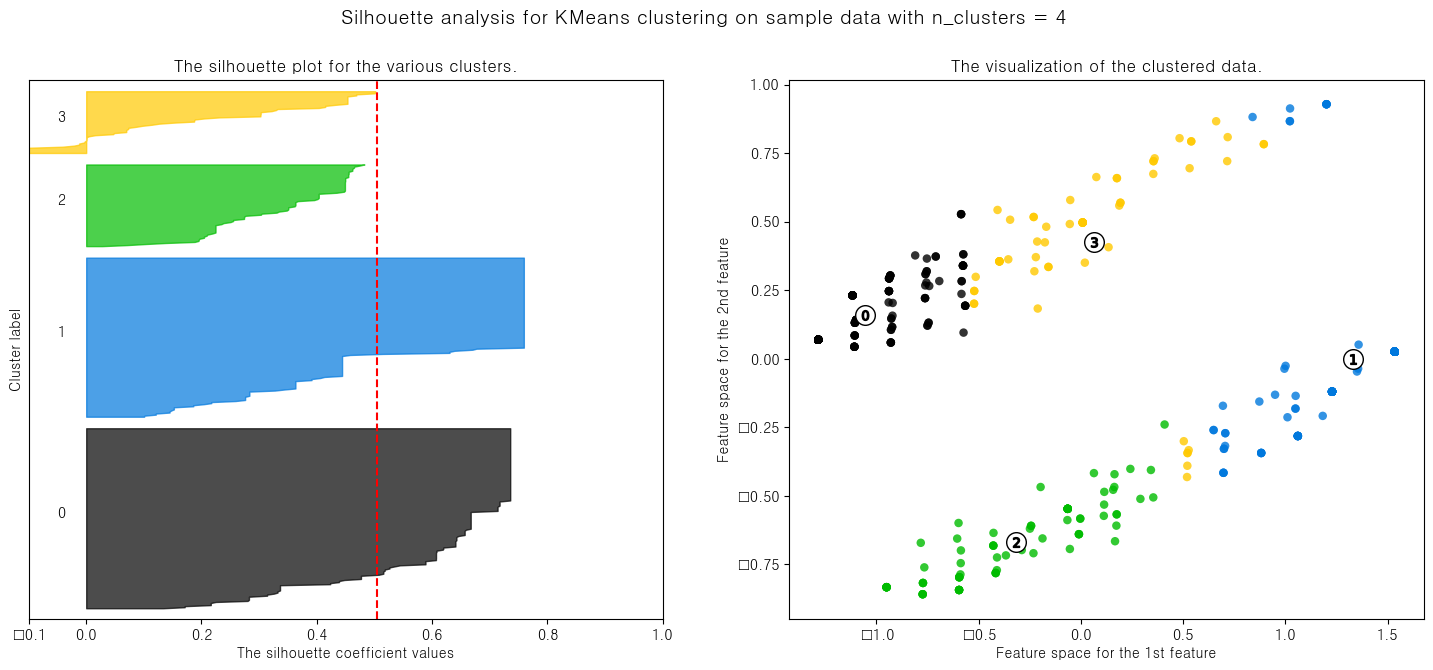

For n_clusters = 4 The average silhouette_score is : 0.5046185265042458


C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


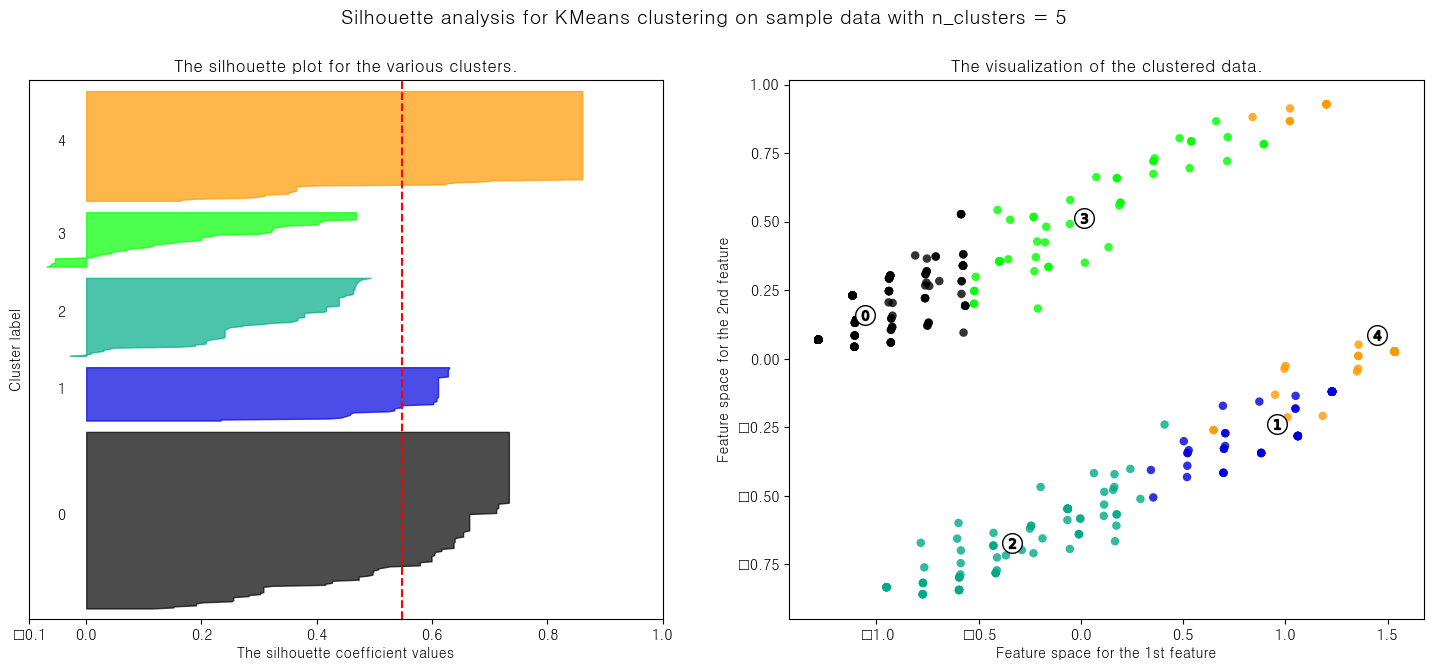

For n_clusters = 5 The average silhouette_score is : 0.5473996587287029


C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


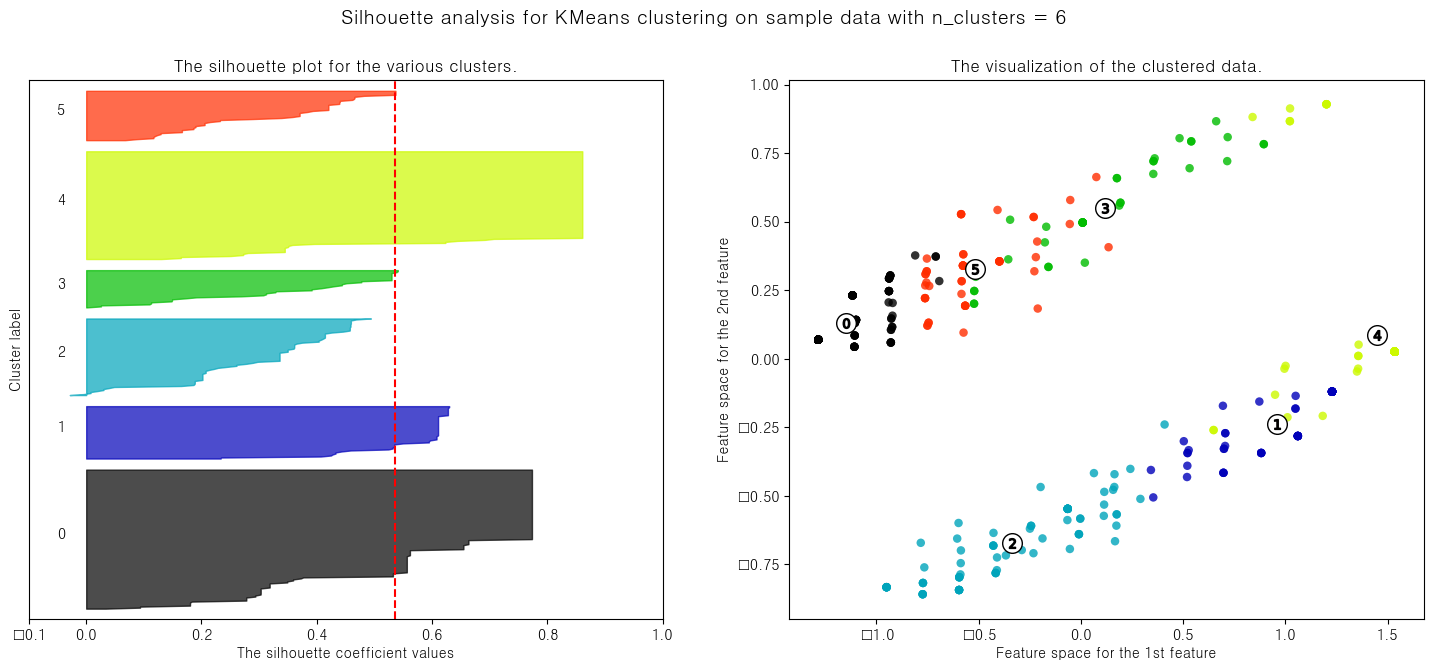

For n_clusters = 6 The average silhouette_score is : 0.5358220157761651


C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


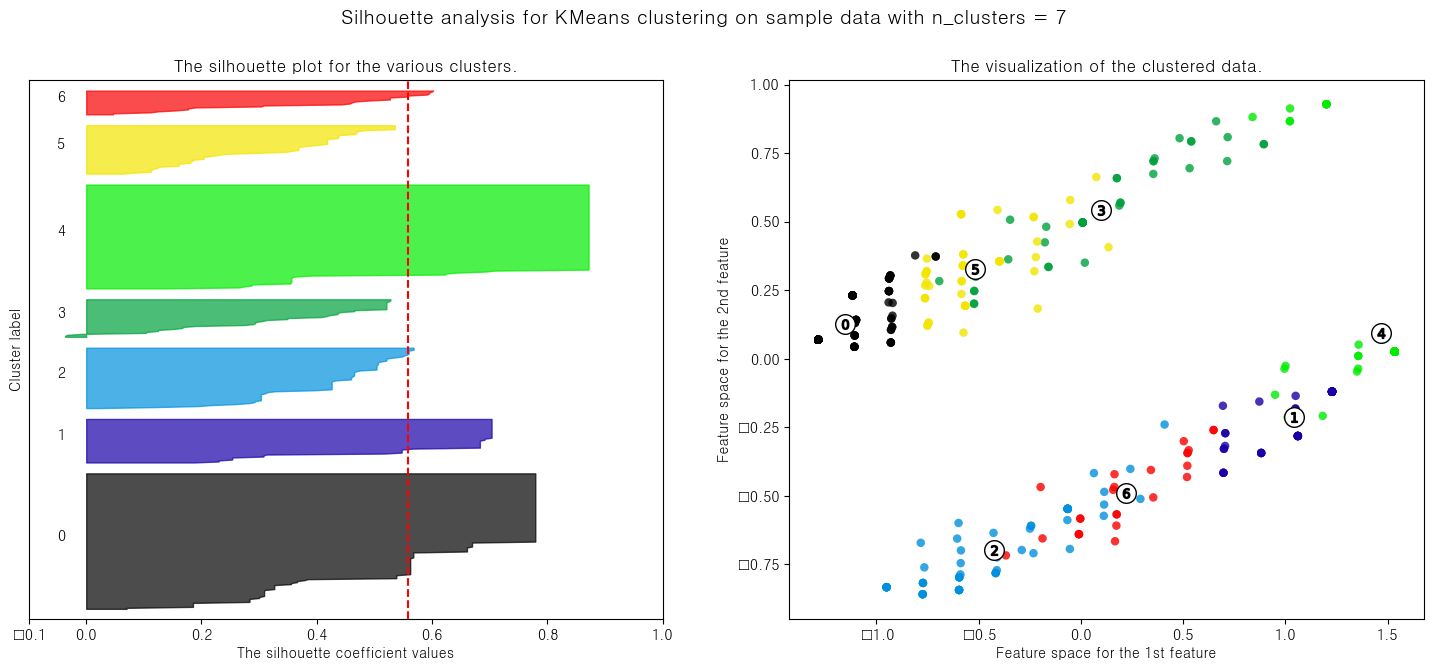

For n_clusters = 7 The average silhouette_score is : 0.5586586255336305


C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


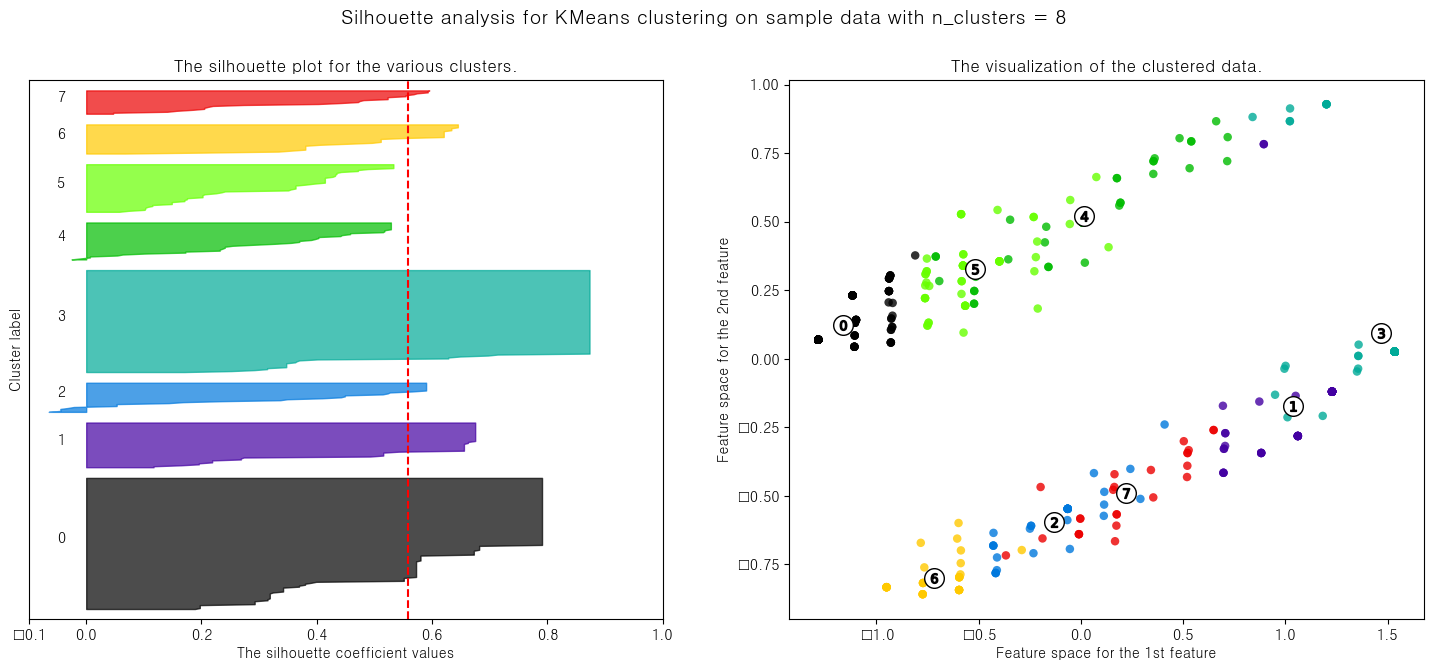

For n_clusters = 8 The average silhouette_score is : 0.5585093477876939


C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


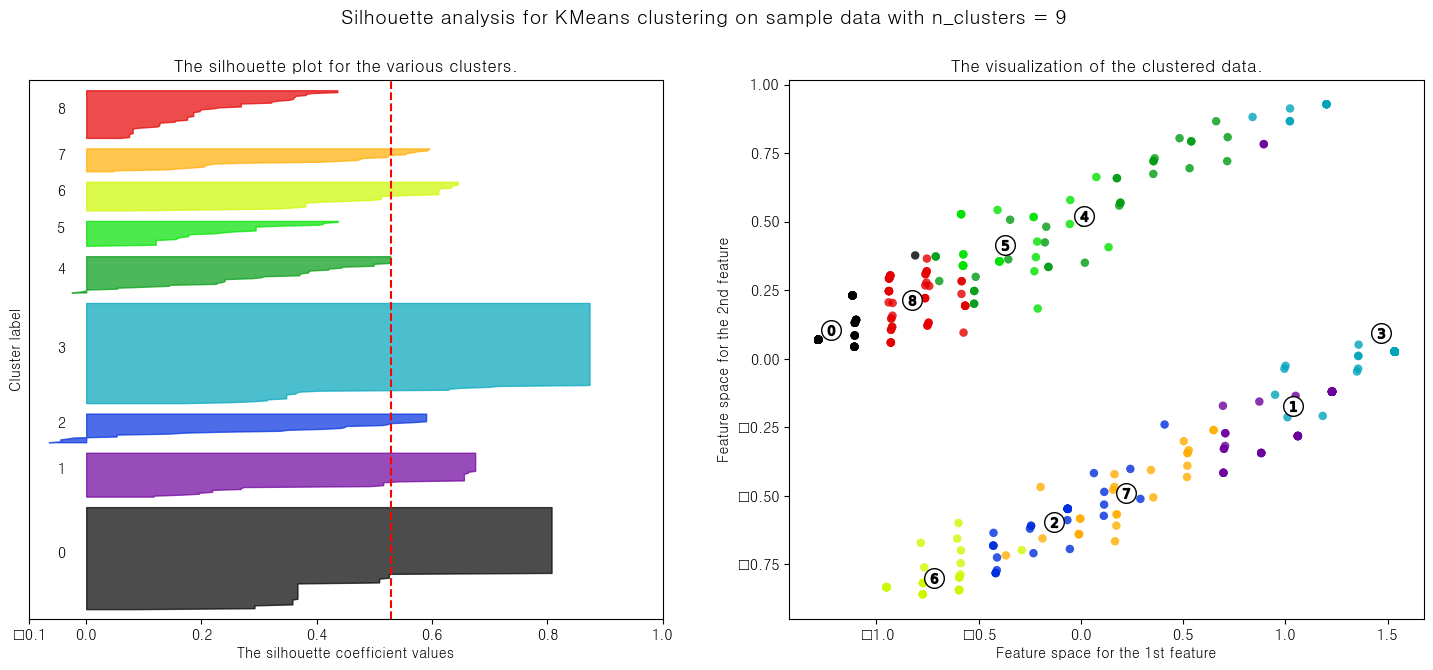

For n_clusters = 9 The average silhouette_score is : 0.5284219975642404


C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


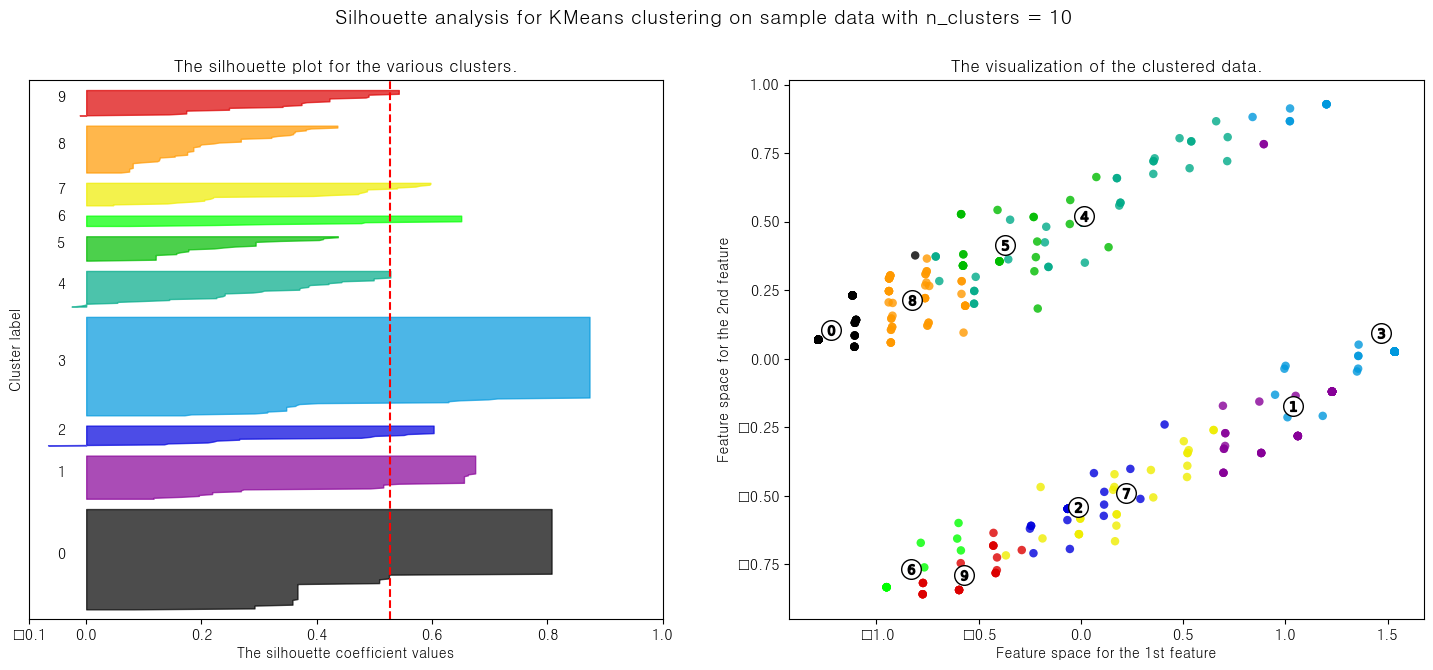

For n_clusters = 10 The average silhouette_score is : 0.5272987598843714


In [584]:
def plot_silhouette(X, num_cluesters):
    for n_clusters in num_cluesters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        clusterer.fit(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, clusterer.labels_)
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, clusterer.labels_)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[clusterer.labels_ == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(clusterer.labels_.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=150, lw=0, alpha=0.8, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
    
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
    
        plt.show()
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

plot_silhouette(pc, [2,3,4,5,6,7,8,9,10])

C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


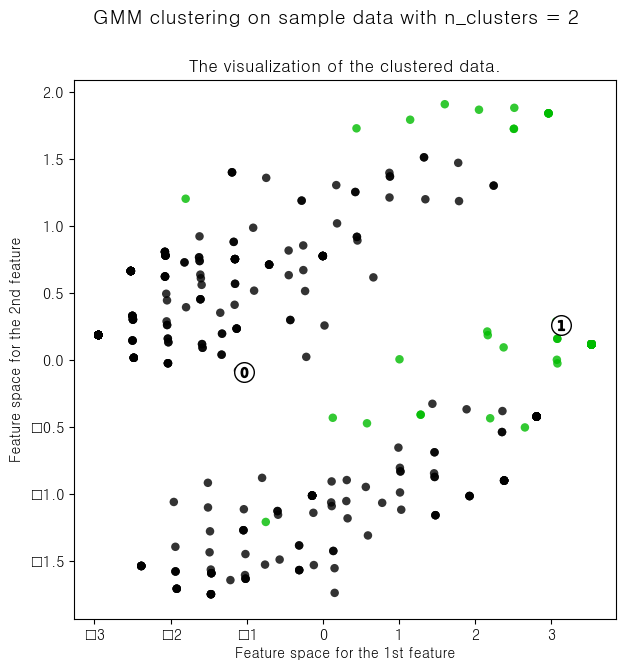

For n_clusters = 2 The average silhouette_score is : 0.4691782181182944


C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


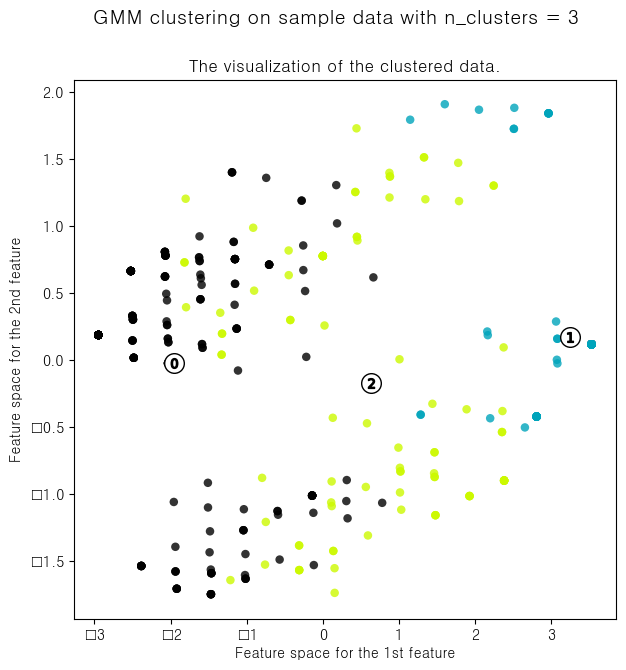

For n_clusters = 3 The average silhouette_score is : 0.4569383328111309


C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


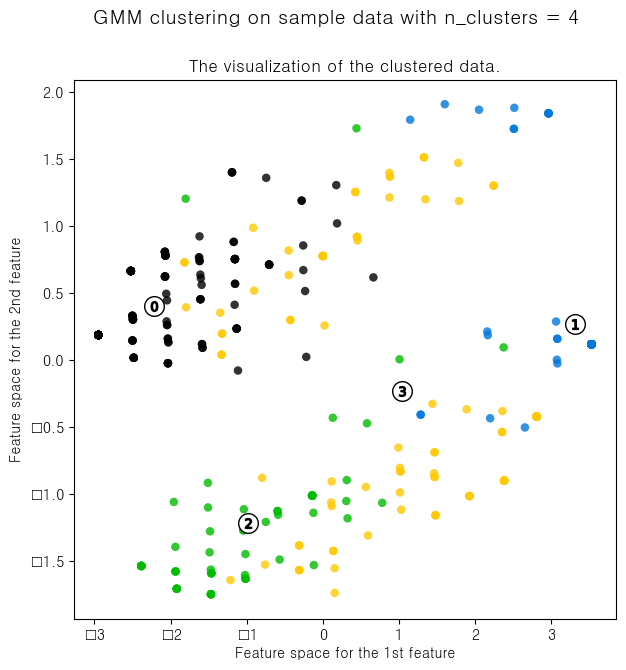

For n_clusters = 4 The average silhouette_score is : 0.46490236091032666


C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


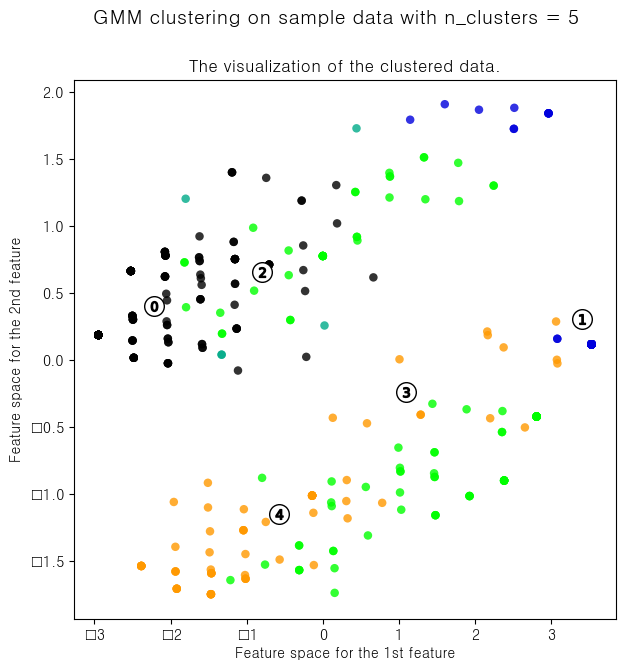

For n_clusters = 5 The average silhouette_score is : 0.4459900642649621


C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


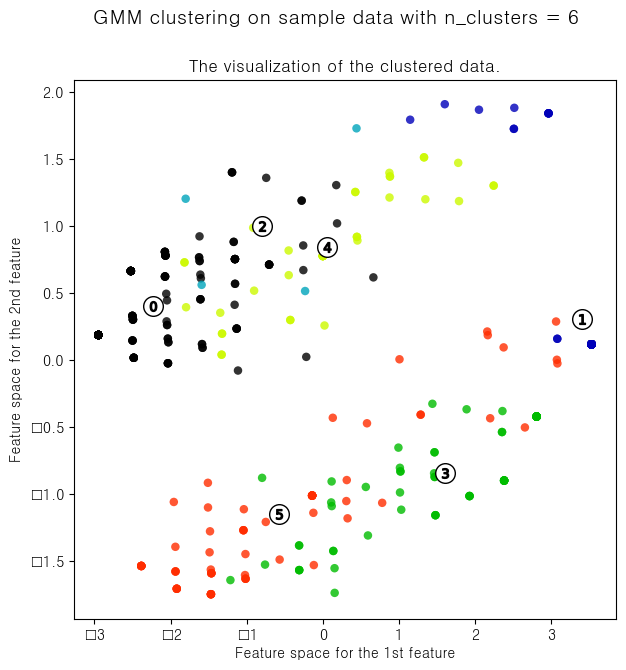

For n_clusters = 6 The average silhouette_score is : 0.45410141067219656


C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


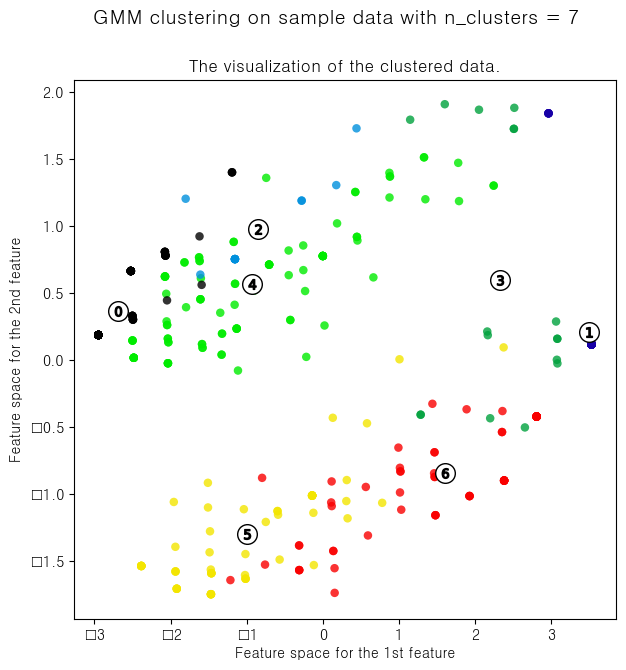

For n_clusters = 7 The average silhouette_score is : 0.40732184075219124


C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


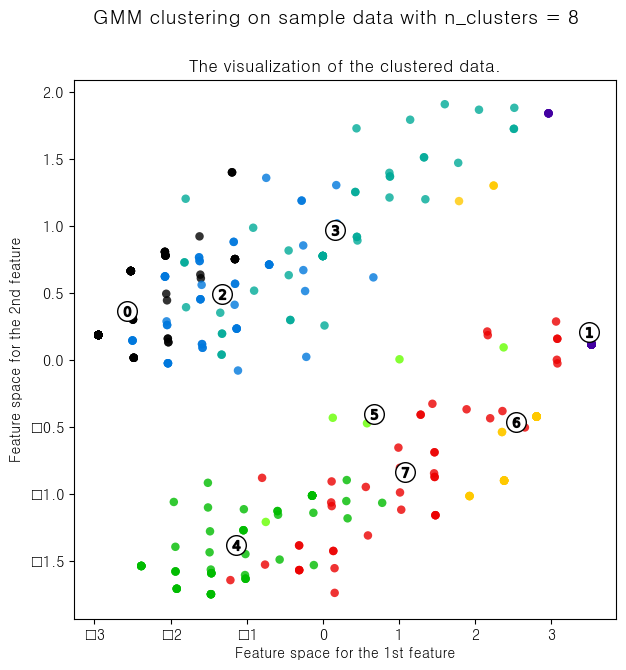

For n_clusters = 8 The average silhouette_score is : 0.466771719772085


C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


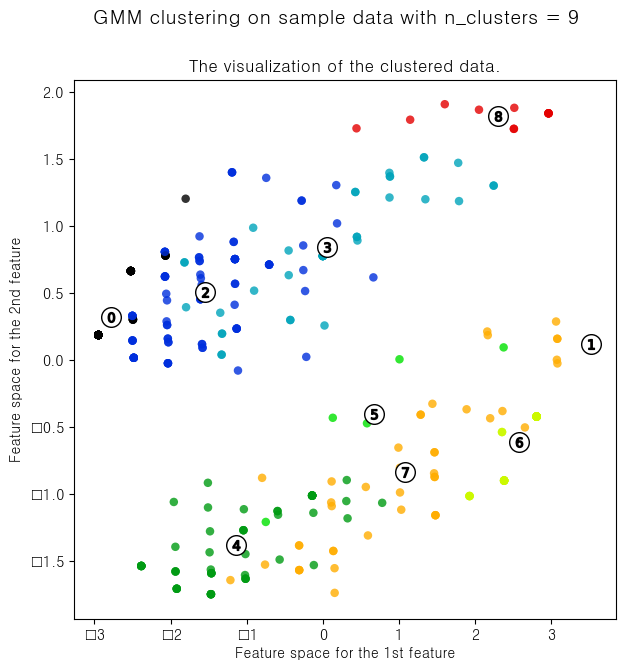

For n_clusters = 9 The average silhouette_score is : 0.48501250595679196


C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


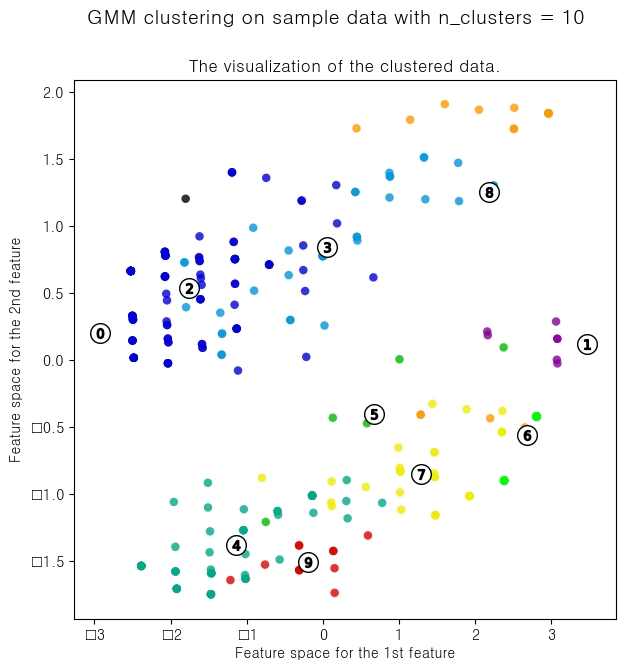

For n_clusters = 10 The average silhouette_score is : 0.472848107154972


In [579]:
from sklearn.mixture import GaussianMixture

def plot_gmm_cluster(X, num_clusters):
    for n_clusters in num_clusters:
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        gmm = GaussianMixture(n_components=n_clusters, random_state=10)
        gmm.fit(X)
        cluster_labels = gmm.predict(X)
        
        # Create a subplot with 1 row and 1 column
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(7, 7)
        
        # The Scatter plot of the clustered data
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax.scatter(X[:, 0], X[:, 1], marker='.', s=150, lw=0, alpha=0.8, c=colors, edgecolor='k')
        
        # Labeling the clusters
        centers = gmm.means_
        # Draw white circles at cluster centers
        ax.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')
        
        for i, c in enumerate(centers):
            ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
        
        ax.set_title("The visualization of the clustered data.")
        ax.set_xlabel("Feature space for the 1st feature")
        ax.set_ylabel("Feature space for the 2nd feature")
        
        plt.suptitle(("GMM clustering on sample data with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        
        silhouette_avg = silhouette_score(X, cluster_labels)
        plt.show()
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

plot_gmm_cluster(pc, [2,3,4,5,6,7,8,9,10])